In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('pandas_test_1.csv')

### Обзор и трансформация данных

In [4]:
data.head()

,user_id,reg_date,job_id,price_per_job,jobs_made
0,3,2020-08-06 14:08:58,0,0.03,1
1,3,2020-08-06 14:08:58,1,0.10,2
2,3,2020-08-06 14:08:58,1,0.10,2
3,3,2020-08-06 14:08:58,2,0.15,1
4,3,2020-08-06 14:08:58,3,1.00,4


In [5]:
data.shape

(79524, 5)

In [6]:
data.nunique()

user_id          2624
reg_date         2621
job_id             14
price_per_job      14
jobs_made        2273
dtype: int64

In [7]:
data.dtypes

user_id            int64
reg_date          object
job_id             int64
price_per_job    float64
jobs_made          int64
dtype: object

In [8]:
data['job_id'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13],
      dtype=int64)

In [9]:
data['job_id'] = data['job_id'].astype('str')
data['reg_date'] = pd.to_datetime(data['reg_date'])

In [10]:
data.dtypes

user_id                   int64
reg_date         datetime64[ns]
job_id                   object
price_per_job           float64
jobs_made                 int64
dtype: object

In [11]:
data.isnull().sum()

user_id          0
reg_date         0
job_id           0
price_per_job    0
jobs_made        0
dtype: int64

In [12]:
data[['price_per_job', 'jobs_made']].describe()

,price_per_job,jobs_made
count,79524.000000,79524.000000
mean,0.186894,139.270371
std,0.145851,910.383290
min,0.030000,1.000000
25%,0.100000,3.000000
50%,0.150000,14.000000
75%,0.150000,66.000000
max,5.000000,57759.000000


In [13]:
price_per_job = data.groupby(['job_id'])['price_per_job'].mean().reset_index()
price_per_job

,job_id,price_per_job
0,0,0.03
1,1,0.10
2,10,5.00
3,11,0.60
4,12,0.50
5,13,0.05
6,2,0.15
7,3,1.00
8,4,0.55
9,5,0.20


In [14]:
sum_jobs = data.groupby(['user_id', 'job_id'])['jobs_made'].sum().reset_index()

### Самая популярная ставка

In [15]:
max_count_jobs = sum_jobs.groupby(['user_id'])['jobs_made'].max().reset_index().rename(columns={'jobs_made': 'max_count_jobs'})
sum_jobs = sum_jobs.merge(max_count_jobs)
most_job = sum_jobs[sum_jobs['jobs_made'] == sum_jobs['max_count_jobs']]

In [16]:
most_job.shape

(2633, 4)

In [17]:
most_job.head()

,user_id,job_id,jobs_made,max_count_jobs
3,3,3,8,8
7,5,4,131,131
13,35,5,77922,77922
18,67,1,74,74
22,68,1,400,400


In [18]:
repeat = most_job.groupby(['user_id'])['job_id'].count().reset_index().rename(columns={'job_id': 'count_job_id'})
repeat[repeat['count_job_id'] != 1]

,user_id,count_job_id
210,168654,2
802,237166,2
1191,252952,2
1681,263389,2
1786,265259,2
1869,266112,2
2113,267570,2
2266,268756,2
2533,269919,2


In [19]:
data.nunique()

user_id          2624
reg_date         2621
job_id             14
price_per_job      14
jobs_made        2273
dtype: int64

In [20]:
data['job_id'].unique()

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13'], dtype=object)

### Средневзвешенная ставка

In [21]:
sum_jobs = data.groupby(['user_id', 'job_id'])['jobs_made'].sum().reset_index()
sum_jobs = sum_jobs.merge(price_per_job, on='job_id')

In [22]:
sum_jobs.sort_values(by='user_id').head()

,user_id,job_id,jobs_made,price_per_job
0,3,0,1,0.03
2338,3,2,3,0.15
4424,3,3,8,1.00
4,3,1,4,0.10
4664,5,5,4,0.20


In [23]:
sum_jobs['sum_price'] = sum_jobs['jobs_made'] * sum_jobs['price_per_job']

In [24]:
sum_jobs.head()

,user_id,job_id,jobs_made,price_per_job,sum_price
0,3,0,1,0.03,0.03
1,8048,0,47,0.03,1.41
2,156275,0,83,0.03,2.49
3,257740,0,40,0.03,1.20
4,3,1,4,0.10,0.40


In [25]:
full_sum_made = sum_jobs.groupby(['user_id'])['jobs_made'].sum().reset_index().rename(columns={'jobs_made': 'full_sum_made'})

In [26]:
full_sum_made.head()

,user_id,full_sum_made
0,3,16
1,5,205
2,35,119748
3,67,198
4,68,568


In [27]:
sum_price = sum_jobs.groupby('user_id')['sum_price'].sum().reset_index()
sum_price = sum_price.merge(full_sum_made)
sum_price['weight_average'] = sum_price['sum_price'] / sum_price['full_sum_made']

In [28]:
sum_price.shape

(2624, 4)

In [29]:
sum_price.head()

,user_id,sum_price,full_sum_made,weight_average
0,3,8.88,16,0.555000
1,5,100.10,205,0.488293
2,35,31553.60,119748,0.263500
3,67,40.70,198,0.205556
4,68,170.35,568,0.299912


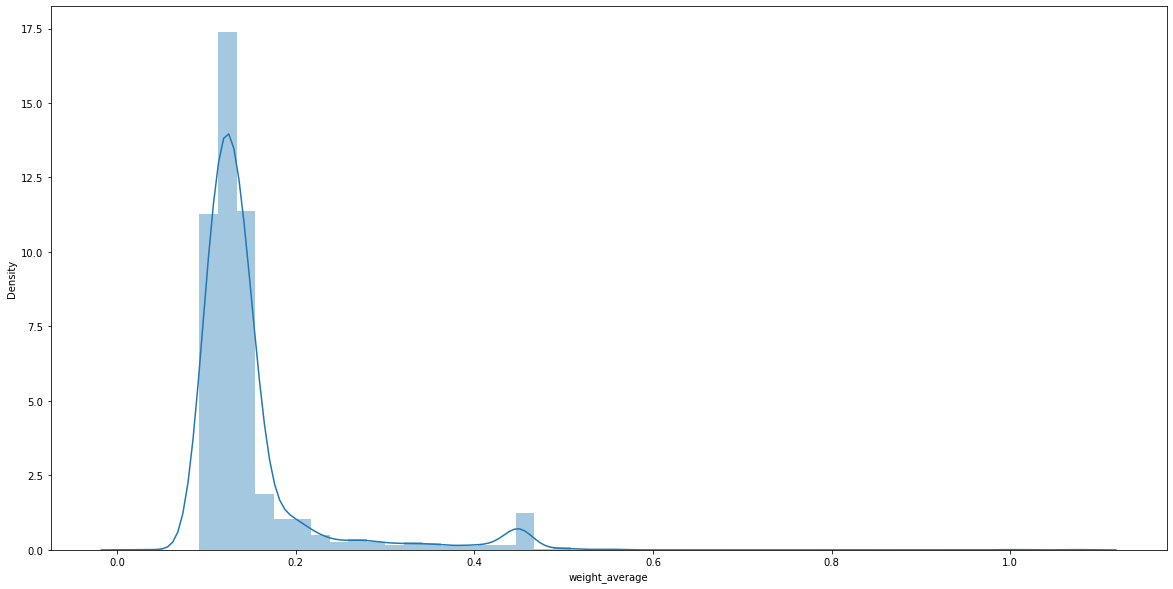

In [30]:
plt.figure(figsize=(20, 10))
sns.distplot(a=sum_price['weight_average'])

In [31]:
sum_price['cut_average'] = pd.cut(sum_price['weight_average'], 10)
sum_price[['cut_average', 'user_id']].groupby(['cut_average'], as_index=False).count().sort_values(by='cut_average') \
    .rename(columns={'user_id': 'count_user_id'})

,cut_average,count_user_id
0,"(0.029, 0.134]",1565
1,"(0.134, 0.238]",864
2,"(0.238, 0.342]",72
3,"(0.342, 0.446]",46
4,"(0.446, 0.55]",74
5,"(0.55, 0.654]",1
6,"(0.654, 0.758]",0
7,"(0.758, 0.863]",0
8,"(0.863, 0.967]",0
9,"(0.967, 1.071]",2


In [32]:
for_barplot = sum_price.groupby(['cut_average'])['weight_average'].count().reset_index() \
    .rename(columns={'cut_average': 'price_intervals', 'weight_average': 'number_of_prices'})

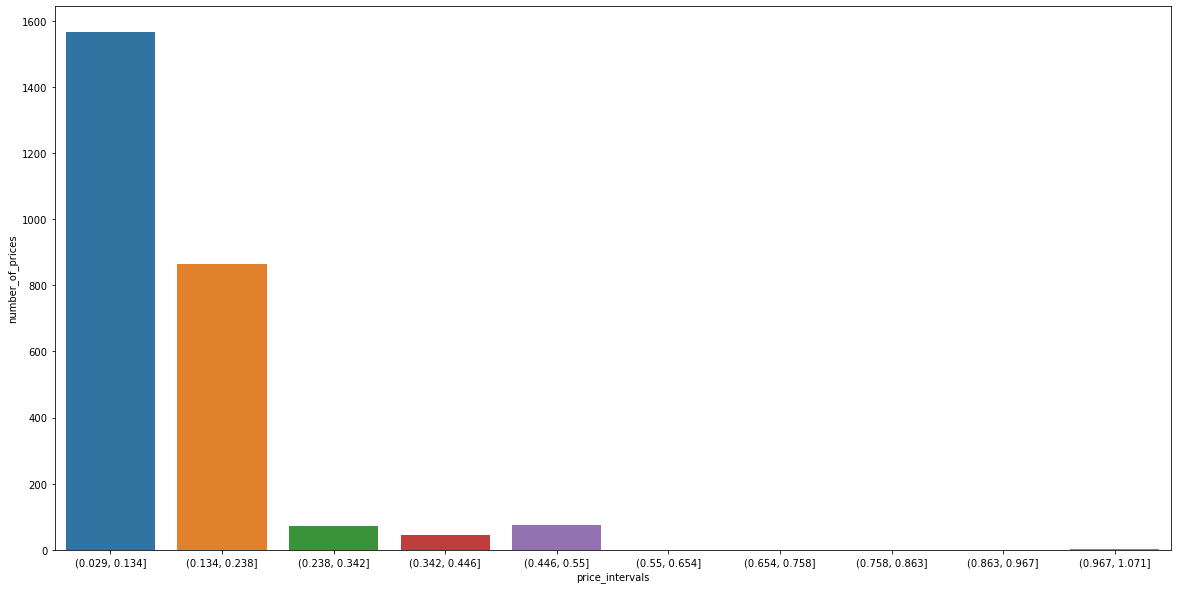

In [33]:
plt.figure(figsize=(20, 10))
sns.barplot(x='price_intervals', y='number_of_prices', data=for_barplot)

In [34]:
sum_price[['cut_average', 'user_id']].groupby(['cut_average'], as_index=False).count().sort_values(by='cut_average') \
    .rename(columns={'user_id': 'count_user_id'})

,cut_average,count_user_id
0,"(0.029, 0.134]",1565
1,"(0.134, 0.238]",864
2,"(0.238, 0.342]",72
3,"(0.342, 0.446]",46
4,"(0.446, 0.55]",74
5,"(0.55, 0.654]",1
6,"(0.654, 0.758]",0
7,"(0.758, 0.863]",0
8,"(0.863, 0.967]",0
9,"(0.967, 1.071]",2


In [35]:
sum_price[['cut_average']] = sum_price[['cut_average']].astype('str')

In [36]:
sum_price[sum_price['cut_average'] == '(0.967, 1.071]']

,user_id,sum_price,full_sum_made,weight_average,cut_average
5,179,165.95,155,1.070645,"(0.967, 1.071]"
522,203708,2.00,2,1.000000,"(0.967, 1.071]"


In [37]:
sum_jobs[sum_jobs['user_id'] == 179]

,user_id,job_id,jobs_made,price_per_job,sum_price
9,179,1,4,0.10,0.40
2343,179,2,1,0.15,0.15
4427,179,3,31,1.00,31.00
4667,179,5,95,0.20,19.00
4820,179,6,1,0.40,0.40
7088,179,10,23,5.00,115.00


In [38]:
sum_price[sum_price['cut_average'] == '(0.446, 0.55]']

,user_id,sum_price,full_sum_made,weight_average,cut_average
1,5,100.10,205,0.488293,"(0.446, 0.55]"
18,1128,417.10,836,0.498923,"(0.446, 0.55]"
81,47157,409.10,807,0.506939,"(0.446, 0.55]"
117,132393,0.45,1,0.450000,"(0.446, 0.55]"
127,141846,7.65,17,0.450000,"(0.446, 0.55]"
...,...,...,...,...,...
2593,270143,5.85,13,0.450000,"(0.446, 0.55]"
2597,270152,2.25,5,0.450000,"(0.446, 0.55]"
2604,270207,6.30,14,0.450000,"(0.446, 0.55]"
2605,270217,28.80,64,0.450000,"(0.446, 0.55]"


In [39]:
sum_jobs[sum_jobs['user_id'] == 47157]

,user_id,job_id,jobs_made,price_per_job,sum_price
72,47157,1,160,0.10,16.00
2396,47157,2,105,0.15,15.75
4440,47157,3,251,1.00,251.00
4484,47157,4,173,0.55,95.15
4714,47157,5,80,0.20,16.00
4858,47157,6,38,0.40,15.20


### Совокупный заработок и как он распределён

In [40]:
sum_jobs.head()

,user_id,job_id,jobs_made,price_per_job,sum_price
0,3,0,1,0.03,0.03
1,8048,0,47,0.03,1.41
2,156275,0,83,0.03,2.49
3,257740,0,40,0.03,1.20
4,3,1,4,0.10,0.40


In [41]:
income = sum_jobs.groupby(['user_id'])['sum_price'].sum().reset_index() \
            .rename(columns={'sum_price': 'income'})

In [42]:
income

,user_id,income
0,3,8.88
1,5,100.10
2,35,31553.60
3,67,40.70
4,68,170.35
...,...,...
2619,270276,32.90
2620,270277,2.30
2621,270282,5.05
2622,270290,2.90


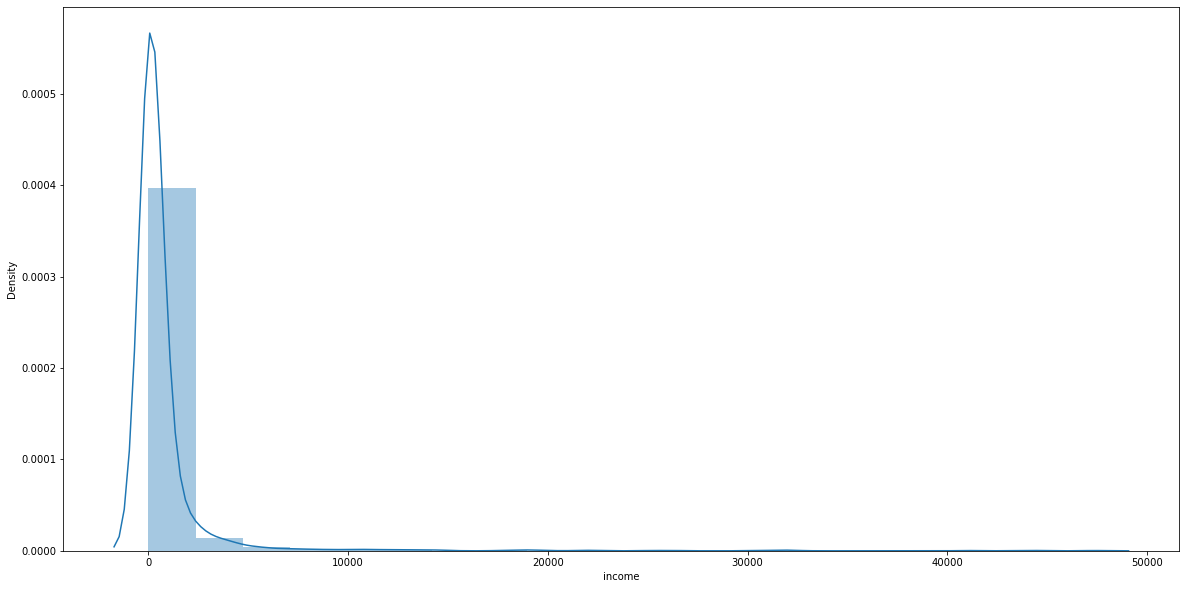

In [43]:
plt.figure(figsize=(20, 10))
sns.distplot(a=income['income'], bins=20)

In [44]:
income['cut_income'] = pd.cut(income['income'], 20)
for_barplot4 = income[['cut_income', 'user_id']].groupby(['cut_income'], as_index=False).count().sort_values(by='cut_income') \
                .rename(columns={'user_id': 'number_of_user_id'})

,cut_income,number_of_user_id
0,"(-47.252, 2367.717]",2468
1,"(2367.717, 4735.335]",87
2,"(4735.335, 7102.952]",23
3,"(7102.952, 9470.57]",12
4,"(9470.57, 11838.187]",9
5,"(11838.187, 14205.805]",6
6,"(14205.805, 16573.422]",2
7,"(16573.422, 18941.04]",3
8,"(18941.04, 21308.657]",2
9,"(21308.657, 23676.275]",2


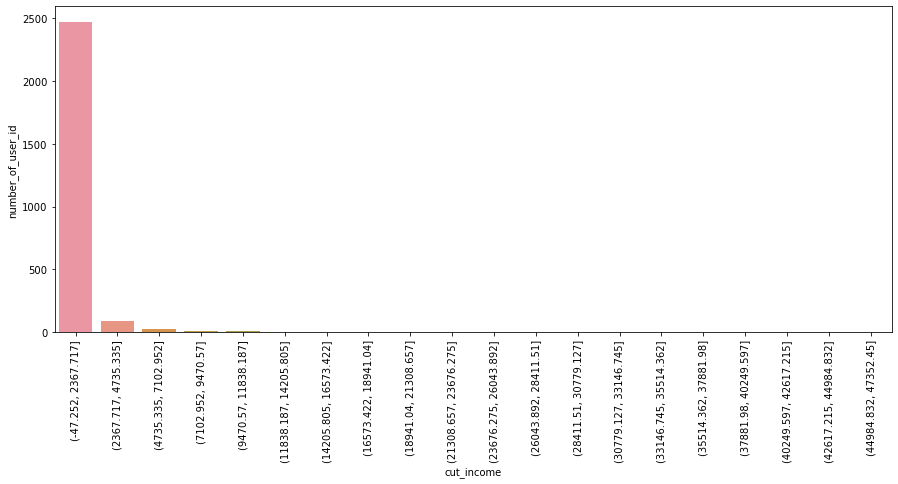

In [45]:
plt.figure(figsize=(15, 6))
plt.xticks(rotation=90)
sns.barplot(x='cut_income', y='number_of_user_id', data=for_barplot4)
for_barplot4

In [46]:
income['cut_income'] = pd.qcut(income['income'], 10)
income[['cut_income', 'user_id']].groupby(['cut_income'], as_index=False).count().sort_values(by='cut_income') \
.rename(columns={'user_id': 'number_of_user_id'})

,cut_income,number_of_user_id
0,"(0.099, 1.7]",264
1,"(1.7, 6.26]",261
2,"(6.26, 16.49]",262
3,"(16.49, 33.81]",263
4,"(33.81, 65.825]",262
5,"(65.825, 132.03]",262
6,"(132.03, 272.48]",263
7,"(272.48, 583.27]",262
8,"(583.27, 1379.235]",262
9,"(1379.235, 47352.45]",263


### Как давно работают пользователи

In [47]:
data.head()

,user_id,reg_date,job_id,price_per_job,jobs_made
0,3,2020-08-06 14:08:58,0,0.03,1
1,3,2020-08-06 14:08:58,1,0.10,2
2,3,2020-08-06 14:08:58,1,0.10,2
3,3,2020-08-06 14:08:58,2,0.15,1
4,3,2020-08-06 14:08:58,3,1.00,4


In [48]:
import datetime as dt

In [49]:
now = dt.datetime.now()

In [50]:
days_at_work = data[['user_id', 'reg_date']]
days_at_work = days_at_work.drop_duplicates(subset=['user_id'])
days_at_work.head()

,user_id,reg_date
0,3,2020-08-06 14:08:58
8,5,2020-02-26 20:59:59
22,35,2020-06-10 15:06:02
218,67,2020-10-04 09:38:47
224,68,2020-08-08 15:59:27


In [51]:
days_at_work['days_at_work'] = (now - days_at_work['reg_date']).dt.days

In [52]:
days_at_work

,user_id,reg_date,days_at_work
0,3,2020-08-06 14:08:58,217
8,5,2020-02-26 20:59:59,379
22,35,2020-06-10 15:06:02,274
218,67,2020-10-04 09:38:47,158
224,68,2020-08-08 15:59:27,215
...,...,...,...
79494,270276,2020-05-09 11:36:00,306
79497,270277,2019-12-24 02:08:14,443
79498,270282,2020-12-07 07:11:17,94
79500,270290,2019-12-12 13:36:33,455


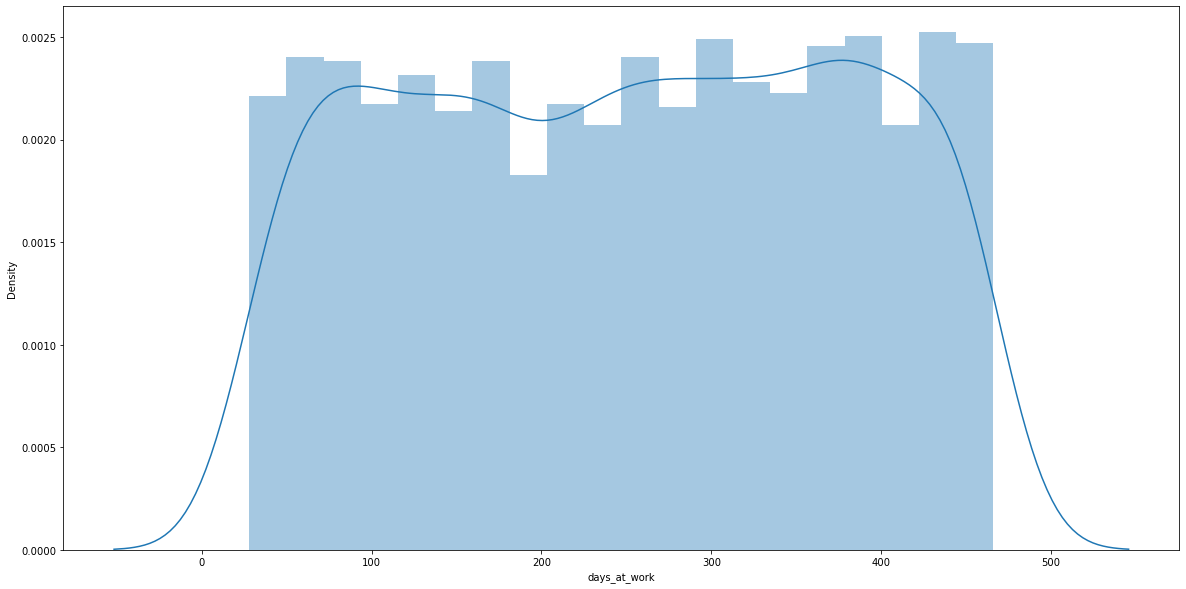

In [53]:
plt.figure(figsize=(20, 10))
sns.distplot(a=days_at_work['days_at_work'], bins=20)

In [54]:
days_at_work['cut_days_at_work'] = pd.cut(days_at_work['days_at_work'], 20)
for_barplot5 = days_at_work[['cut_days_at_work', 'days_at_work']].groupby(['cut_days_at_work'], as_index=False) \
                .count().sort_values(by='cut_days_at_work').rename(columns={'days_at_work': 'number_days_at_work'})

,cut_days_at_work,number_days_at_work
0,"(27.562, 49.9]",127
1,"(49.9, 71.8]",138
2,"(71.8, 93.7]",137
3,"(93.7, 115.6]",125
4,"(115.6, 137.5]",133
5,"(137.5, 159.4]",123
6,"(159.4, 181.3]",137
7,"(181.3, 203.2]",105
8,"(203.2, 225.1]",125
9,"(225.1, 247.0]",121


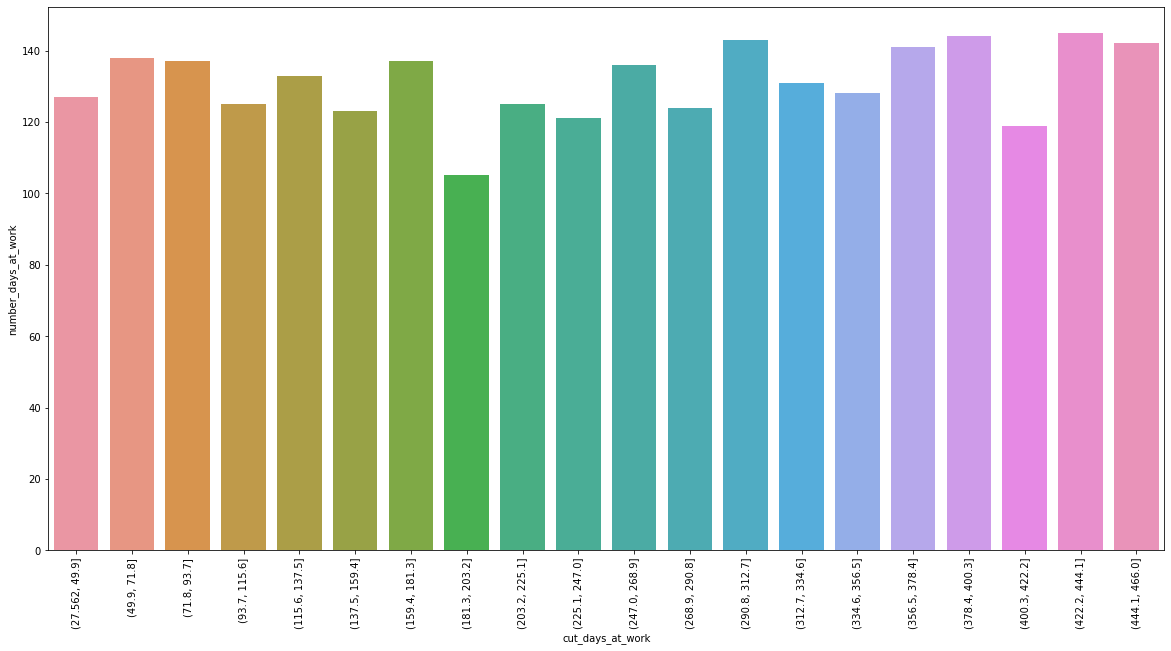

In [55]:
plt.figure(figsize=(20, 10))
plt.xticks(rotation=90)
sns.barplot(x='cut_days_at_work', y='number_days_at_work', data=for_barplot5)
for_barplot5

### Общее количество выполненных заданий

In [56]:
full_sum_made.head()

,user_id,full_sum_made
0,3,16
1,5,205
2,35,119748
3,67,198
4,68,568


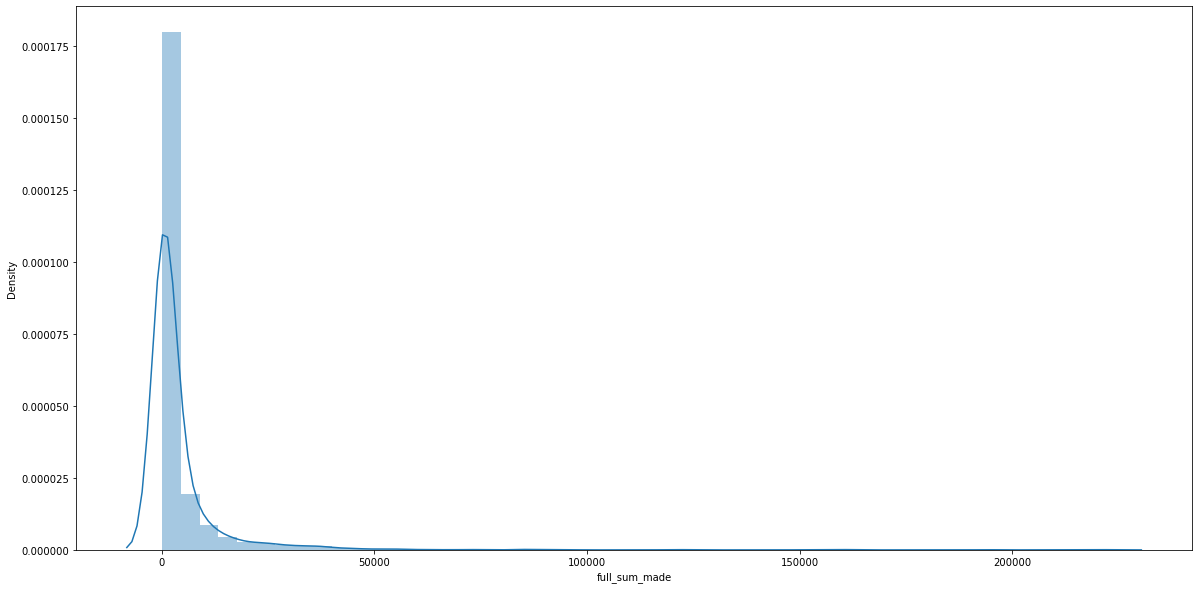

In [57]:
plt.figure(figsize=(20, 10))
sns.distplot(a=full_sum_made['full_sum_made'])

In [58]:
full_sum_made['cut_full_sum_made'] = pd.cut(full_sum_made['full_sum_made'], 10)
for_barplot6 = full_sum_made[['cut_full_sum_made', 'full_sum_made']].groupby(['cut_full_sum_made'], as_index=False) \
                .count().sort_values(by='cut_full_sum_made')

In [59]:
for_barplot6

,cut_full_sum_made,full_sum_made
0,"(-221.151, 22216.1]",2507
1,"(22216.1, 44431.2]",87
2,"(44431.2, 66646.3]",14
3,"(66646.3, 88861.4]",5
4,"(88861.4, 111076.5]",2
5,"(111076.5, 133291.6]",2
6,"(133291.6, 155506.7]",1
7,"(155506.7, 177721.8]",2
8,"(177721.8, 199936.9]",1
9,"(199936.9, 222152.0]",3


### Интересные пользователи

In [60]:
users = days_at_work[['user_id', 'days_at_work']]
users = users.merge(income[['user_id', 'income']])
users = users.merge(full_sum_made[['user_id', 'full_sum_made']])
users = users.merge(sum_price[['user_id', 'weight_average']])
users.head()

,user_id,days_at_work,income,full_sum_made,weight_average
0,3,217,8.88,16,0.555000
1,5,379,100.10,205,0.488293
2,35,274,31553.60,119748,0.263500
3,67,158,40.70,198,0.205556
4,68,215,170.35,568,0.299912


In [61]:
threshold_income = 10000

In [62]:
income_users = users[users['income'] > threshold_income]

In [63]:
income_users = income_users.reset_index().drop(['index'], axis=1)
income_users.sort_values(by='income', ascending=False)[:10][:]

,user_id,days_at_work,income,full_sum_made,weight_average
2,196,28,47352.45,194110,0.243946
13,6239,28,44430.40,222152,0.200000
12,6236,28,43515.20,217576,0.200000
8,2901,28,41027.75,207800,0.197439
19,112445,462,32218.40,161092,0.200000
25,156277,303,31768.40,158842,0.200000
0,35,274,31553.60,119748,0.263500
20,117313,34,30374.40,151872,0.200000
14,7715,169,26304.25,92148,0.285457
5,1132,361,25168.55,124425,0.202279


In [64]:
threshold_days = 60
threshold_income = 10000

In [65]:
super_users = users[(users['days_at_work'] < threshold_days) & (users['income'] > threshold_income)]

In [66]:
super_users = super_users.reset_index().drop(['index'], axis=1)
super_users.sort_values(by='income', ascending=False)

,user_id,days_at_work,income,full_sum_made,weight_average
1,196,28,47352.45,194110,0.243946
4,6239,28,44430.40,222152,0.200000
3,6236,28,43515.20,217576,0.200000
2,2901,28,41027.75,207800,0.197439
5,117313,34,30374.40,151872,0.200000
0,187,43,18887.80,94415,0.200051


In [67]:
data[data['user_id'] == 6236]

,user_id,reg_date,job_id,price_per_job,jobs_made
4245,6236,2021-02-10 23:59:58,5,0.2,1692
4246,6236,2021-02-10 23:59:58,5,0.2,9040
4247,6236,2021-02-10 23:59:58,5,0.2,29021
4248,6236,2021-02-10 23:59:58,5,0.2,29312
4249,6236,2021-02-10 23:59:58,5,0.2,35423
4250,6236,2021-02-10 23:59:58,5,0.2,44320
4251,6236,2021-02-10 23:59:58,5,0.2,31914
4252,6236,2021-02-10 23:59:58,5,0.2,36661
79514,6236,2021-02-10 23:59:58,5,0.2,193


In [68]:
data[data['user_id'] == 6239]

,user_id,reg_date,job_id,price_per_job,jobs_made
4253,6239,2021-02-10 23:59:58,5,0.2,3954
4254,6239,2021-02-10 23:59:58,5,0.2,9439
4255,6239,2021-02-10 23:59:58,5,0.2,43176
4256,6239,2021-02-10 23:59:58,5,0.2,39042
4257,6239,2021-02-10 23:59:58,5,0.2,36931
4258,6239,2021-02-10 23:59:58,5,0.2,57759
4259,6239,2021-02-10 23:59:58,5,0.2,10
4260,6239,2021-02-10 23:59:58,5,0.2,817
4261,6239,2021-02-10 23:59:58,5,0.2,30488
79515,6239,2021-02-10 23:59:58,5,0.2,536


In [69]:
data[data['user_id'] == 196]

,user_id,reg_date,job_id,price_per_job,jobs_made
267,196,2021-02-10 23:59:58,4,0.55,2
268,196,2021-02-10 23:59:58,4,0.55,1285
269,196,2021-02-10 23:59:58,7,0.30,437
270,196,2021-02-10 23:59:58,2,0.15,16
271,196,2021-02-10 23:59:58,5,0.20,131
...,...,...,...,...,...
517,196,2021-02-10 23:59:58,5,0.20,133
518,196,2021-02-10 23:59:58,1,0.10,64
519,196,2021-02-10 23:59:58,5,0.20,10451
520,196,2021-02-10 23:59:58,2,0.15,20


In [70]:
data[data['user_id'] == 196]['price_per_job'].unique()

array([0.55, 0.3 , 0.15, 0.2 , 0.4 , 0.1 , 0.45, 0.35, 5.  ])

In [71]:
threshold2_days = 30
threshold2_income = 1000

In [72]:
newbies = users[(users['days_at_work'] < threshold2_days) & (users['income'] < threshold2_income)]

In [73]:
newbies.reset_index(drop=True)

,user_id,days_at_work,income,full_sum_made,weight_average
0,255812,29,64.5,511,0.126223


In [74]:
data[data['user_id'] == 258638]

,user_id,reg_date,job_id,price_per_job,jobs_made
59626,258638,2021-02-09 02:15:16,1,0.10,26
59627,258638,2021-02-09 02:15:16,8,0.45,77
59628,258638,2021-02-09 02:15:16,8,0.45,30
59629,258638,2021-02-09 02:15:16,1,0.10,9
59630,258638,2021-02-09 02:15:16,1,0.10,3


In [75]:
users.sort_values(by='weight_average', ascending=False)[:10]

,user_id,days_at_work,income,full_sum_made,weight_average
5,179,124,165.95,155,1.070645
522,203708,263,2.00,2,1.000000
0,3,217,8.88,16,0.555000
453,192847,342,632.40,1150,0.549913
364,185772,95,79.60,157,0.507006
81,47157,302,409.10,807,0.506939
1268,255660,216,2345.60,4665,0.502808
18,1128,263,417.10,836,0.498923
1,5,379,100.10,205,0.488293
449,191780,454,255.35,542,0.471125


### Пользователи, которых можно попытаться вернуть

In [76]:
full_sum_made_threshold = 5
days_at_work_threshold = 60
days_at_work_threshold2 = 90

In [77]:
lost_users = users[(users['full_sum_made'] < full_sum_made_threshold) & (users['days_at_work'] >= days_at_work_threshold) & \
                  (users['days_at_work'] <= days_at_work_threshold2)]
lost_users = lost_users.reset_index().drop(['index'], axis=1)
lost_users.sort_values(by='full_sum_made')

,user_id,days_at_work,income,full_sum_made,weight_average
1,269680,62,0.15,1,0.15
0,269346,87,0.30,3,0.10


### Типы заданий

In [78]:
for_barplot2 = sum_jobs.groupby(['job_id'])['jobs_made'].sum().reset_index().sort_values(by='job_id') \
    .rename(columns={'jobs_made': 'sum_jobs_made'})

In [79]:
#price_per_job['job_id'] = price_per_job['job_id'].astype('int64')
for_barplot2 = for_barplot2.merge(price_per_job)
for_barplot2 = for_barplot2.sort_values(by='price_per_job')

,job_id,sum_jobs_made,price_per_job
0,0,171,0.03
5,13,3,0.05
1,1,5149450,0.10
6,2,2565696,0.15
9,5,2095925,0.20
11,7,261171,0.30
13,9,389281,0.35
10,6,64386,0.40
12,8,171367,0.45
4,12,9092,0.50


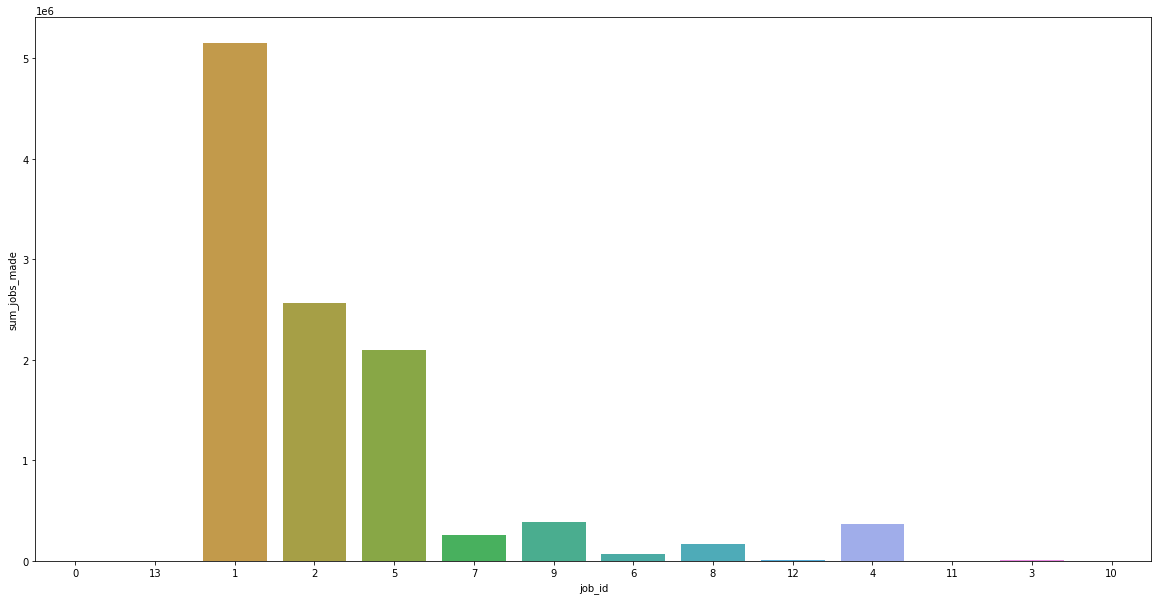

In [80]:
plt.figure(figsize=(20, 10))
sns.barplot(x='job_id', y='sum_jobs_made', data=for_barplot2, order=for_barplot2['job_id'])
for_barplot2

### Корреляция данных

In [81]:
users.head()

,user_id,days_at_work,income,full_sum_made,weight_average
0,3,217,8.88,16,0.555000
1,5,379,100.10,205,0.488293
2,35,274,31553.60,119748,0.263500
3,67,158,40.70,198,0.205556
4,68,215,170.35,568,0.299912


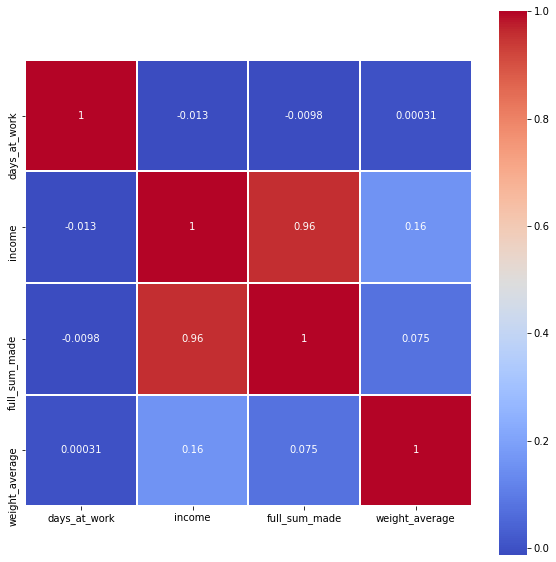

In [82]:
users_corr = users.drop(['user_id'], axis=1)
corr_mat = users_corr.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr_mat, annot=True, square=True, cmap='coolwarm', linewidths=1)

<Figure size 288x288 with 0 Axes>

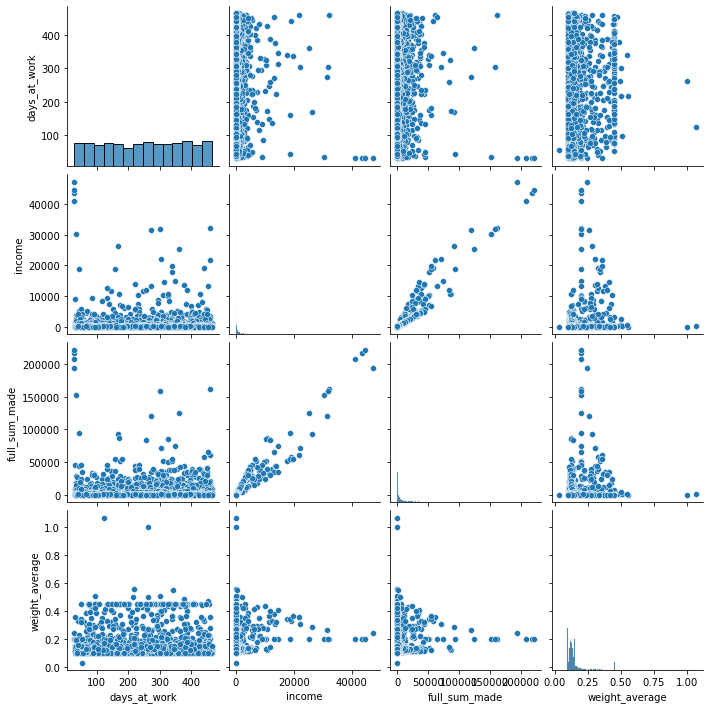

In [83]:
plt.figure(figsize=(4, 4))
sns.pairplot(users_corr)